In [1]:
# Dependencies and Setup
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.io as pio
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
import mpld3

# jay's data
newdf = pd.read_csv("data/clean_all_data.csv")
sexdf = newdf.drop(newdf[newdf['SEX CATEGORY'] == 'Overall'].index)
racedf = newdf.drop(newdf[newdf['RACE CATEGORY'] == 'Overall'].index)
agedf = newdf.drop(newdf[newdf['AGE DATA'] == 0].index)


In [2]:
# Get unique race categories
sex_categories = sexdf['SEX CATEGORY'].unique()

# Create dropdown menu options
buttons = []
for sex in sex_categories:
    visibility = [True if r == sex else False for r in sexdf['SEX CATEGORY']]
    buttons.append(
        dict(
            label=sex,
            method="update",
            args=[{"visible": visibility}, {"title": f"Weekly Rate by {sex}"}]
        )
    )

# Add "BOTH sexes" option
buttons.append(
    dict(
        label="Both Sexes",
        method="update",
        args=[{"visible": [True] * len(sexdf)}, {"title": "Weekly Rate by Sex Category"}]
    )
)

# Create interactive plot using Plotly Express
fig = px.line(sexdf, x='WEEK DATA', y='WEEKLY RATE', color='SEX CATEGORY', title='Weekly Rate by Sex Category')

# Add dropdown menu for filtering by Sex category
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Show the figure
fig.show()
fig.write_html("interactive_sex_plot.html")

In [3]:
# Get unique race categories
race_categories = racedf['RACE CATEGORY'].unique()

# Create dropdown menu options
buttons = []
for race in race_categories:
    visibility = [True if r == race else False for r in racedf['RACE CATEGORY']]
    buttons.append(
        dict(
            label=race,
            method="update",
            args=[{"visible": visibility}, {"title": f"Weekly Rate by {race}"}]
        )
    )

# Add "All Races" option
buttons.append(
    dict(
        label="All Races",
        method="update",
        args=[{"visible": [True] * len(racedf)}, {"title": "Weekly Rate by Race Category"}]
    )
)

# Create interactive plot using Plotly Express
fig = px.line(racedf, x='WEEK DATA', y='WEEKLY RATE', color='RACE CATEGORY', title='Weekly Rate by Race Category')

# Add dropdown menu for filtering by race category
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Show the figure
fig.show()
fig.write_html("interactive_race_plot.html")

In [4]:
# Get unique Age categories
age_categories = agedf['AGE CATEGORY'].unique()

# Create dropdown menu options
options = [{'label': age, 'value': age} for age in age_categories]

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    dcc.Graph(id='age-plot'),
    dcc.Dropdown(
        id='age-dropdown',
        options=options,
        value=age_categories[0]
    )
])

# Define callback to update the plot based on dropdown selection
@app.callback(
    Output('age-plot', 'figure'),
    [Input('age-dropdown', 'value')]
)
def update_plot(selected_age):
    # Filter DataFrame based on selected age
    filtered_df = agedf[agedf['AGE CATEGORY'] == selected_age]
    
    # Create plot with a different title
    fig = px.line(filtered_df, x='WEEK DATA', y='WEEKLY RATE', color='AGE CATEGORY', title=f"Rate Over Time for {selected_age}")
    
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

    # After the server stops running, export the figure to HTML
    fig = px.line(agedf, x='WEEK DATA', y='WEEKLY RATE', color='AGE CATEGORY', title="Weekly Rate by Age Category")
    pio.write_html(fig, 'interactive_age_plot.html')

In [5]:
#christian's data
starter_df = pd.read_csv('data/State_Custom_Data.csv')
starter_df['NUM INFLUENZA DEATHS'] = pd.to_numeric(starter_df['NUM INFLUENZA DEATHS'], errors = 'coerce')
starter_df = starter_df.dropna(subset=['NUM INFLUENZA DEATHS'])
starter_df['NUM INFLUENZA DEATHS'] = starter_df['NUM INFLUENZA DEATHS'].astype(int)
influenzadeathsbystate = starter_df.groupby('SUB AREA')['NUM INFLUENZA DEATHS'].sum()
influenzadeathsbystate = influenzadeathsbystate.tolist()
starter_df_states = starter_df.drop_duplicates(subset=['SUB AREA'])
states = starter_df_states['SUB AREA'].tolist()
data_dict = {'States': states, 'Influenza Deaths': influenzadeathsbystate}
influenza_deaths_df = pd.DataFrame(data_dict)

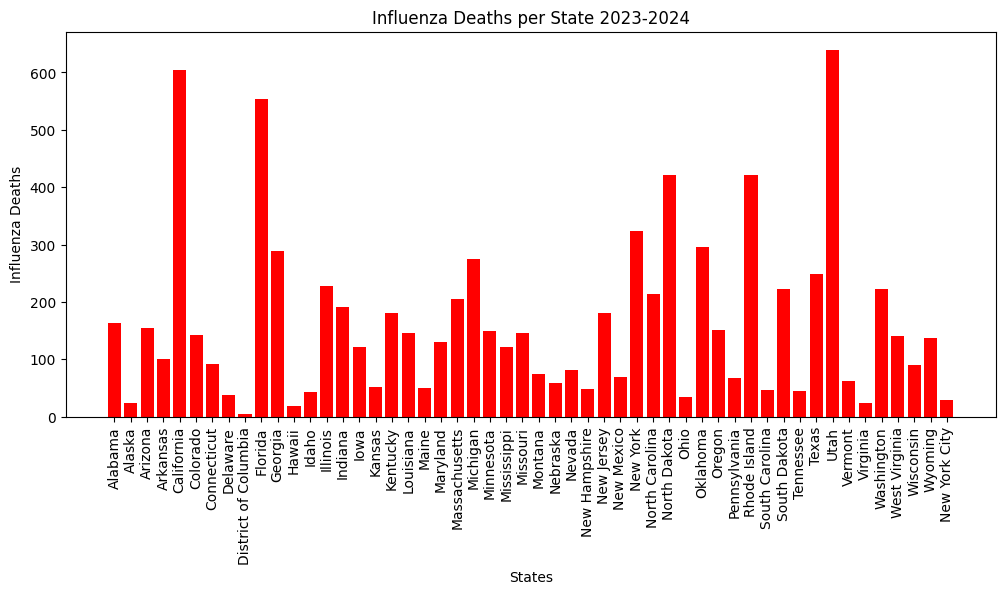

In [6]:
states = influenza_deaths_df['States']
deaths = influenza_deaths_df['Influenza Deaths']


plt.figure(figsize=(12, 5))
plt.bar(states, deaths, color='red')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Influenza Deaths')
plt.title('Influenza Deaths per State 2023-2024')
plt.show()

import plotly.express as px

states = influenza_deaths_df['States']
deaths = influenza_deaths_df['Influenza Deaths']

fig = px.bar(x=states, y=deaths, labels={'x':'States', 'y':'Influenza Deaths'}, title='Influenza Deaths per State 2023-2024')
fig.show()
fig.write_html("interactive_mortality_plot.html")

In [7]:
#walter's data
# Load the data from the CSV files
ILI = pd.read_csv("data/ILINet.csv")
CLD = pd.read_csv("data/WHO_NREVSS_Clinical_Labs.csv")
PHLD = pd.read_csv("data/WHO_NREVSS_Public_Health_Labs.csv")

# Display the first few rows of each DataFrame
display("ILINet Data:")
display(ILI.head())

display("\nClinical Labs Data:")
display(CLD.head())

display("\nPublic Health Labs Data:")
display(PHLD.head())


'ILINet Data:'

PERCENTAGE OF VISITS FOR INFLUENZA-LIKE-ILLNESS REPORTED BY SENTINEL PROVIDERS
REGION TYPE REGION   YEAR WEEK % WEIGHTED ILI %UNWEIGHTED ILI AGE 0-4 AGE 25-49 AGE 25-64 AGE 5-24 AGE 50-64 AGE 65 ILITOTAL NUM. OF PROVIDERS                                     TOTAL PATIENTS                            
States      Alabama  2023 40   X              2.386           X       X         X         X        X         X      1024     106                                                            42917                            
            Alaska   2023 40   X              3.46432         X       X         X         X        X         X      134      12                                                              3868                            
            Arizona  2023 40   X              1.93528         X       X         X         X        X         X      1446     122                                                            74718                            
            Arkansas 2023 40   X              1.5546          X       X         X         X        X         X      252      52                                                             16210

'\nClinical Labs Data:'

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B
0,States,Alabama,2023,40,359,7,2,2.51,1.95,0.56
1,States,Alaska,2023,40,X,X,X,X,X,X
2,States,Arizona,2023,40,183,2,0,1.09,1.09,0
3,States,Arkansas,2023,40,407,5,3,1.97,1.23,0.74
4,States,California,2023,40,3333,26,5,0.93,0.78,0.15


'\nPublic Health Labs Data:'

,REGION TYPE,REGION,SEASON_DESCRIPTION,TOTAL SPECIMENS,A (2009 H1N1),A (H3),A (Subtyping not Performed),B,BVic,BYam,H3N2v
0,States,Alabama,Season 2023-24,202,25,6,5,0,13,0,0
1,States,Alaska,Season 2023-24,45,6,1,3,3,0,0,0
2,States,Arizona,Season 2023-24,2484,481,92,9,3,151,0,0
3,States,Arkansas,Season 2023-24,1339,45,191,200,6,36,0,0
4,States,California,Season 2023-24,5092,1333,371,124,83,170,0,0


In [8]:
# Convert relevant columns to numeric
PHLD[['TOTAL SPECIMENS', 'A (2009 H1N1)', 'A (H3)', 'A (Subtyping not Performed)', 'B', 'BVic', 'BYam', 'H3N2v']] = PHLD[['TOTAL SPECIMENS', 'A (2009 H1N1)', 'A (H3)', 'A (Subtyping not Performed)', 'B', 'BVic', 'BYam', 'H3N2v']].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing or NaN values
PHLD_cleaned = PHLD.dropna()

# Display the first few rows of the cleaned DataFrame
display(PHLD_cleaned.head())

# Export the cleaned DataFrame to a CSV file
PHLD_cleaned.to_csv('PHLD_cleaned.csv', index=False)

,REGION TYPE,REGION,SEASON_DESCRIPTION,TOTAL SPECIMENS,A (2009 H1N1),A (H3),A (Subtyping not Performed),B,BVic,BYam,H3N2v
0,States,Alabama,Season 2023-24,202.0,25.0,6.0,5.0,0.0,13.0,0.0,0.0
1,States,Alaska,Season 2023-24,45.0,6.0,1.0,3.0,3.0,0.0,0.0,0.0
2,States,Arizona,Season 2023-24,2484.0,481.0,92.0,9.0,3.0,151.0,0.0,0.0
3,States,Arkansas,Season 2023-24,1339.0,45.0,191.0,200.0,6.0,36.0,0.0,0.0
4,States,California,Season 2023-24,5092.0,1333.0,371.0,124.0,83.0,170.0,0.0,0.0


HTML file saved as interactive_strain_pie.html


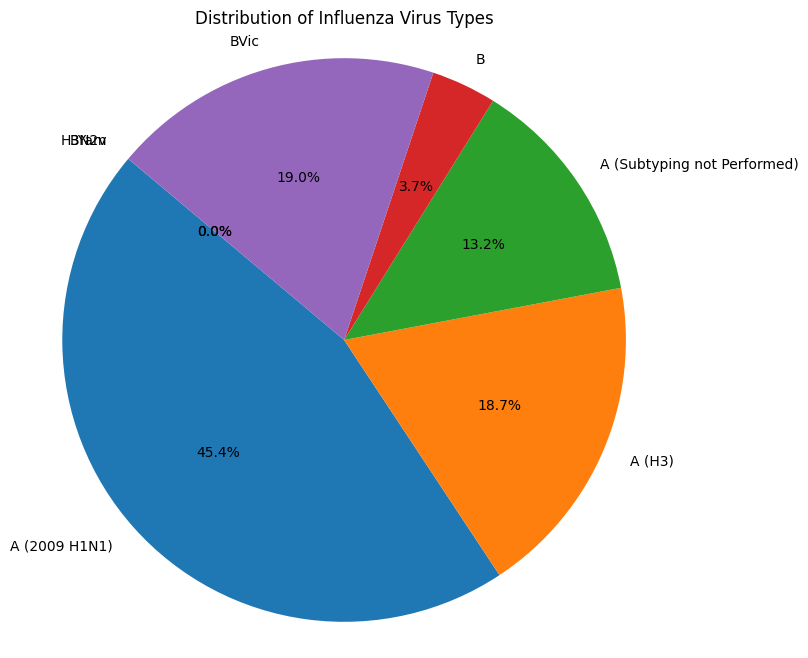

In [9]:
# Data for the pie chart
labels = ['A (2009 H1N1)', 'A (H3)', 'A (Subtyping not Performed)', 'B', 'BVic', 'BYam', 'H3N2v']
sizes = [PHLD[label].sum() for label in labels]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Influenza Virus Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the plot to an HTML file
html_file = "interactive_strain_pie.html"
mpld3.save_html(plt.gcf(), html_file)
print(f"HTML file saved as {html_file}")

# Show the plot
plt.show()

HTML file for pie chart saved as interactive_strain_pie.html


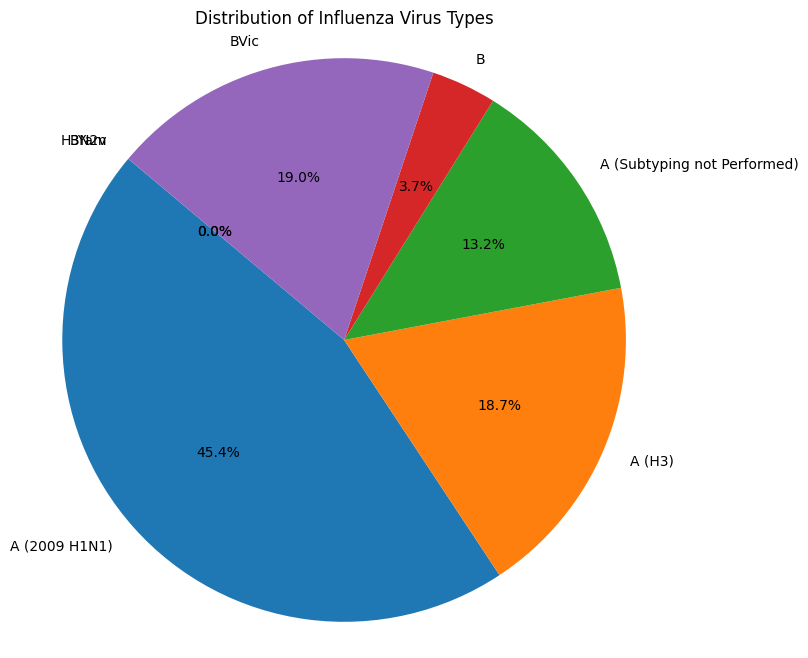

HTML file for stacked bar chart saved as interactive_region_bar.html


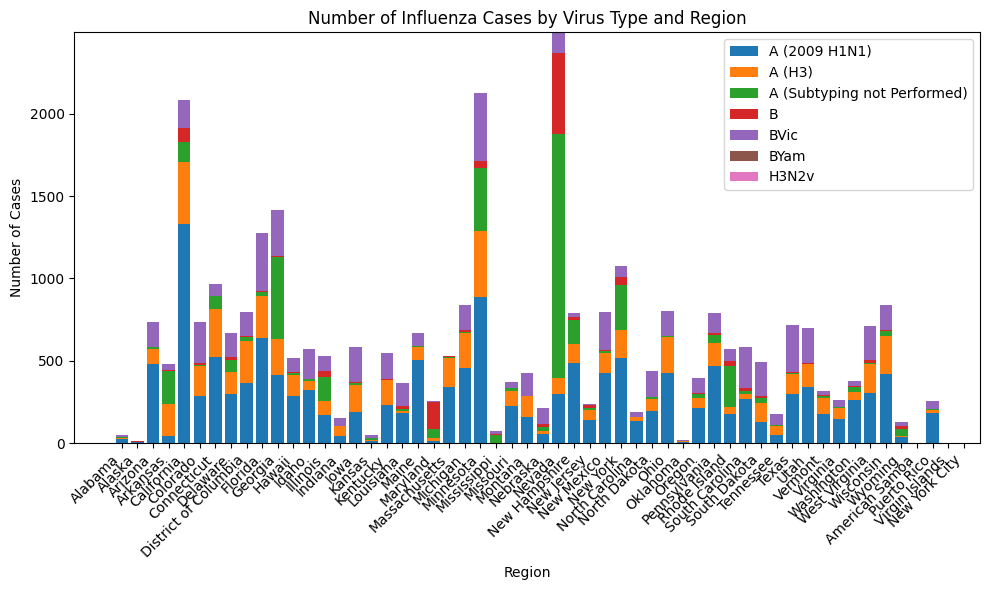

In [10]:
# Data for the pie chart
labels = ['A (2009 H1N1)', 'A (H3)', 'A (Subtyping not Performed)', 'B', 'BVic', 'BYam', 'H3N2v']
sizes = [PHLD[label].sum() for label in labels]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Influenza Virus Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the pie chart to an HTML file
pie_html_file = "interactive_strain_pie.html"
mpld3.save_html(plt.gcf(), pie_html_file)
print(f"HTML file for pie chart saved as {pie_html_file}")

# Show the pie chart
plt.show()

# Data for the stacked bar chart
regions = PHLD['REGION']
virus_types = ['A (2009 H1N1)', 'A (H3)', 'A (Subtyping not Performed)', 'B', 'BVic', 'BYam', 'H3N2v']
data = PHLD[virus_types]

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
x = np.arange(len(regions))
bottom = np.zeros(len(regions))
for virus_type in virus_types:
    plt.bar(x, data[virus_type], bottom=bottom, label=virus_type)
    bottom += np.array(data[virus_type])

plt.xlabel('Region')
plt.ylabel('Number of Cases')
plt.title('Number of Influenza Cases by Virus Type and Region')
plt.xticks(x, regions, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Save the stacked bar chart to an HTML file
bar_html_file = "interactive_region_bar.html"
mpld3.save_html(plt.gcf(), bar_html_file)
print(f"HTML file for stacked bar chart saved as {bar_html_file}")

# Show the stacked bar chart
plt.show()

interactive(children=(Dropdown(description='State:', options=('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Cal…

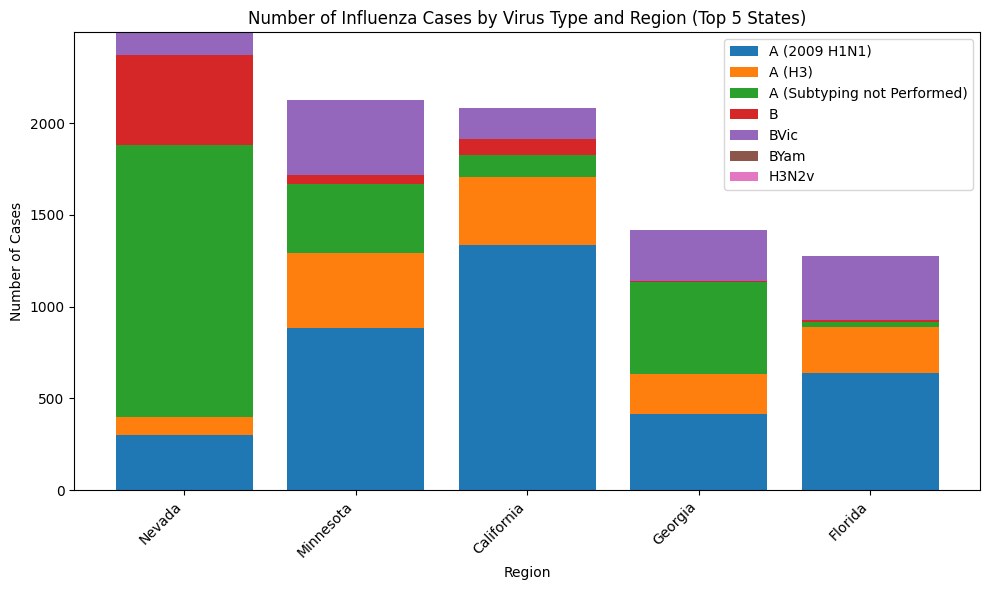

In [13]:
# Load the data from the CSV files
ILI = pd.read_csv("National By State/ILINet.csv")
CLD = pd.read_csv("National By State/WHO_NREVSS_Clinical_Labs.csv")
PHLD = pd.read_csv("National By State/WHO_NREVSS_Public_Health_Labs.csv")

# Convert relevant columns to numeric
PHLD[['TOTAL SPECIMENS', 'A (2009 H1N1)', 'A (H3)', 'A (Subtyping not Performed)', 'B', 'BVic', 'BYam', 'H3N2v']] = PHLD[['TOTAL SPECIMENS', 'A (2009 H1N1)', 'A (H3)', 'A (Subtyping not Performed)', 'B', 'BVic', 'BYam', 'H3N2v']].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing or NaN values
PHLD_cleaned = PHLD.dropna()

# Define the data
virus_types = ['A (2009 H1N1)', 'A (H3)', 'A (Subtyping not Performed)', 'B', 'BVic', 'BYam', 'H3N2v']
data = PHLD_cleaned[virus_types]

# Calculate the national average distribution of virus types
national_avg_sizes = data.sum() / len(PHLD_cleaned['REGION'].unique())

# Define the labels for the pie chart
labels = virus_types

# Function to update the pie chart based on the selected state
def update_pie_chart(state):
    state_data = PHLD_cleaned[PHLD_cleaned['REGION'] == state]
    state_sizes = [state_data[label].sum() for label in labels]

    # Create a pie chart for the selected state
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.pie(state_sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Influenza Virus Types in {state}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Create a pie chart for the national average
    plt.subplot(1, 2, 2)
    plt.pie(national_avg_sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('National Average Distribution of Influenza Virus Types')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

# Create dropdown widget for selecting states
state_dropdown = widgets.Dropdown(options=PHLD_cleaned['REGION'].unique(), description='State:')

# Display the dropdown widget and the interactive pie chart
interact(update_pie_chart, state=state_dropdown)

# Sort the data by the total number of cases for each state
sorted_data = data.sum(axis=1).sort_values(ascending=False)

# Select only the top 5 states
top_5_states = sorted_data.head(5).index

# Filter the data to include only the top 5 states
data_top_5 = data.loc[top_5_states]

# Define the data
regions = PHLD.loc[top_5_states, 'REGION']

# Create a stacked bar chart
plt.figure(figsize=(10, 6))

# Define the x locations for the groups
x = np.arange(len(regions))

# Plot each virus type as a separate bar for the top 5 states
bottom = np.zeros(len(regions))
for virus_type in virus_types:
    plt.bar(x, data_top_5[virus_type], bottom=bottom, label=virus_type)
    bottom += np.array(data_top_5[virus_type])

plt.xlabel('Region')
plt.ylabel('Number of Cases')
plt.title('Number of Influenza Cases by Virus Type and Region (Top 5 States)')
plt.xticks(x, regions, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

